In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SaYoPillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
df['sl'].value_counts()

0    126
1    126
2    126
3    126
4    126
Name: sl, dtype: int64

In [4]:
(df.isna().sum() / df.shape[0]).sort_values()

sr      0.0
rr      0.0
t       0.0
lm      0.0
bo      0.0
rem     0.0
sr.1    0.0
hr      0.0
sl      0.0
dtype: float64

In [5]:
df.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [6]:
X = df.drop(['sl'],axis=1)
y = df['sl']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train , y_train)
model.score(X_test,y_test)

1.0

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=3).mean()

1.0

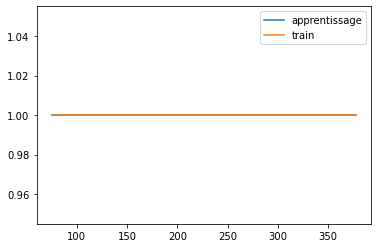

In [15]:
from sklearn.model_selection import learning_curve

N , train_score , val_score = learning_curve(model , X_train , y_train , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [16]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [17]:
pred = model.predict(X_test)

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
confusion_matrix